
Column Data Types:
Data Description:    object
dtype: object
Encoding column: Data Description:

Cleaned Data Overview:
   Data Description:
0                 14
1                 13
2                 12
3                  7
4                 15

Missing Values in the Dataset:
Data Description:    0
dtype: int64

Summary Statistics:
       Data Description:
count          18.000000
mean            8.500000
std             5.338539
min             0.000000
25%             4.250000
50%             8.500000
75%            12.750000
max            17.000000


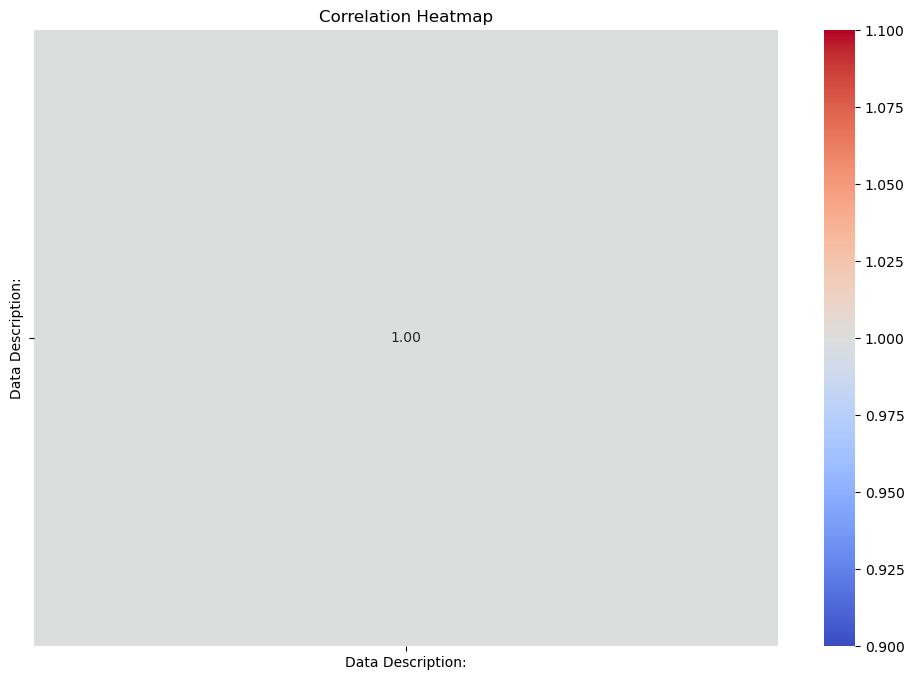

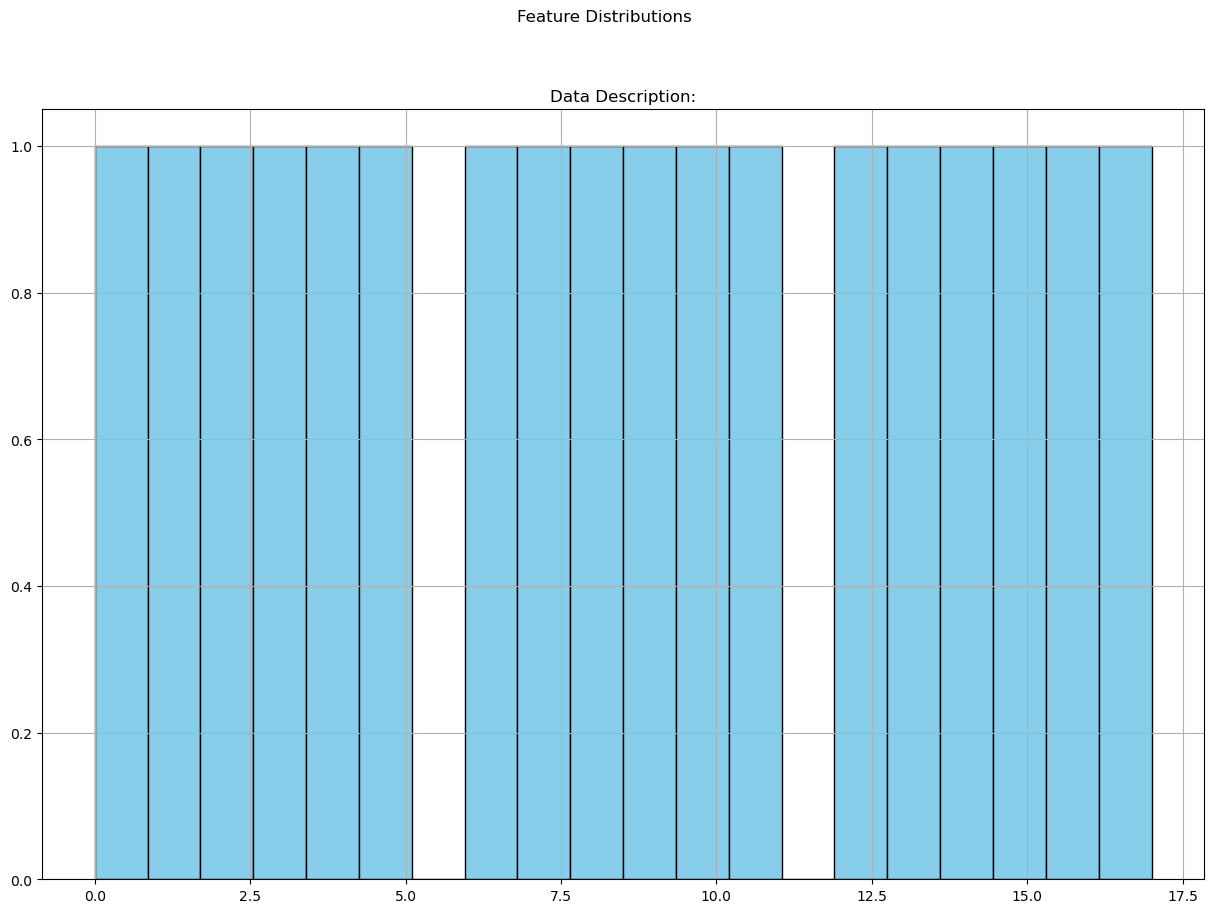

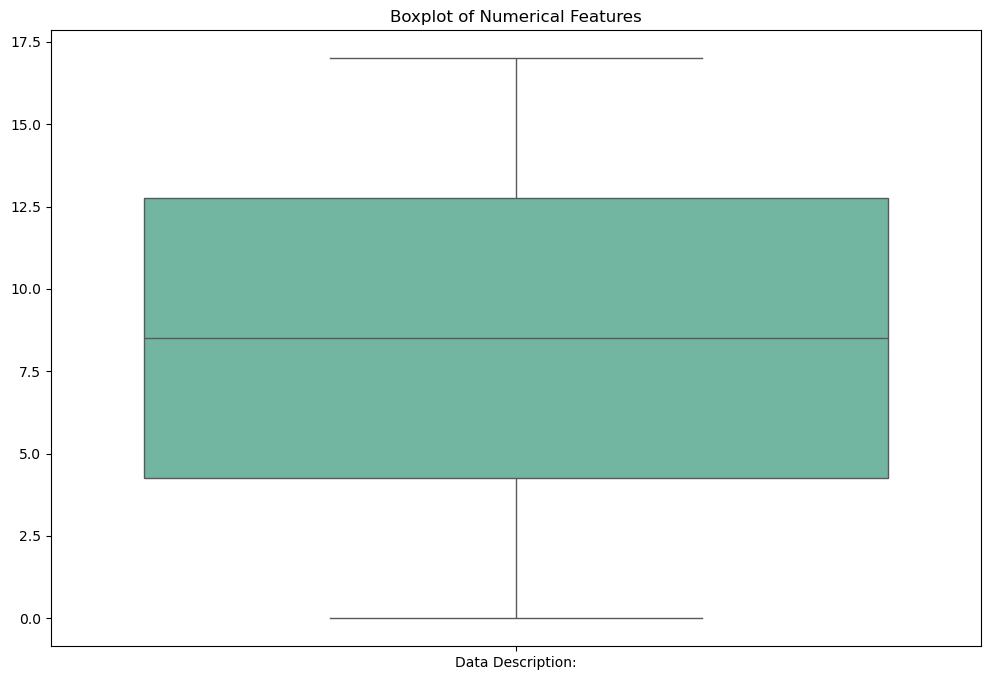


Random Forest Model Evaluation:
Accuracy: 0.0000
Classification Report:
               precision    recall  f1-score   support

           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

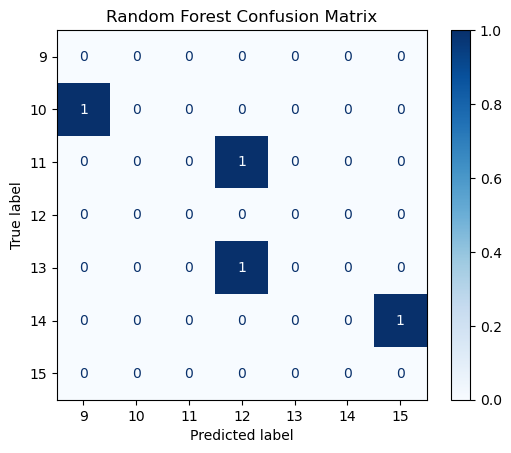


Bagging Model Evaluation:
Accuracy: 0.0000
Classification Report:
               precision    recall  f1-score   support

           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea


Boosting Model Evaluation:
Accuracy: 0.0000
Classification Report:
               precision    recall  f1-score   support

           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

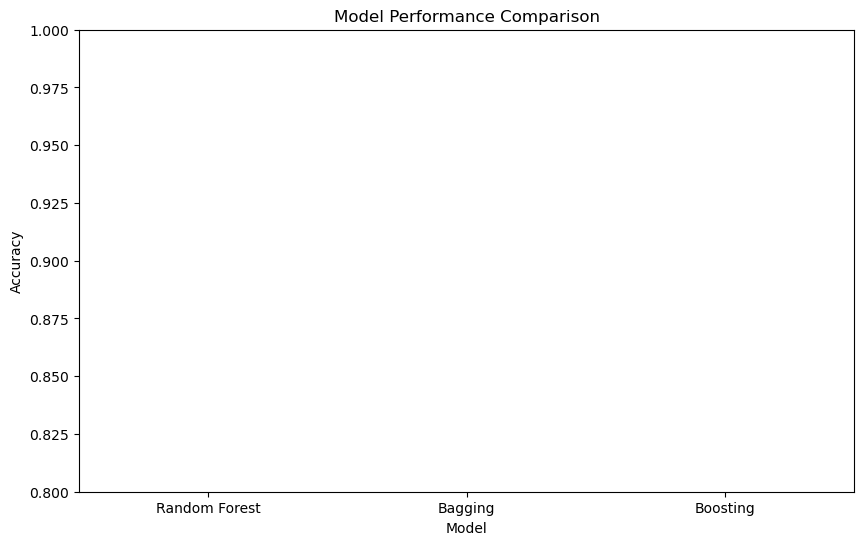


Bagging vs Boosting:
Bagging (Bootstrap Aggregating) trains multiple models on different subsets of the training data, reducing variance and improving model stability. Random Forest is an example of Bagging.
Boosting trains models sequentially, focusing on the errors of previous models to improve accuracy. It reduces bias and often achieves higher accuracy but may overfit if not tuned properly.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Step 1: Load the Dataset and Handle Metadata
df = pd.read_excel(r'C:\Users\admin\Downloads\Random Forest\Random Forest\glass.xlsx', skiprows=1)

# Step 2: Clean Data 
print("\nColumn Data Types:")
print(df.dtypes)

# Handle non-numeric columns
for col in df.select_dtypes(include=['object']):
    print(f"Encoding column: {col}")
    df[col] = LabelEncoder().fit_transform(df[col])

# Convert to numeric and drop NaN rows
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Verify data after cleaning
print("\nCleaned Data Overview:")
print(df.head())


# Check for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Feature Distributions
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, palette='Set2')
plt.title('Boxplot of Numerical Features')
plt.show()

# Step 3: Data Preprocessing
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode target variable using LabelEncoder
le = LabelEncoder()
df_imputed['Data Description'] = le.fit_transform(df_imputed['Data Description:'])

# Standardize features using StandardScaler
scaler = StandardScaler()
X = df_imputed.drop(columns='Data Description:')  
y = df_imputed['Data Description']
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Random Forest Model Implementation
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_classifier.predict(X_test)
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test, y_test, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Step 6: Bagging and Boosting Models
# Bagging Classifier
base_model = DecisionTreeClassifier()
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

print("\nBagging Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bagging):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_bagging))

# Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)

print("\nBoosting Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_boosting):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_boosting))

# Step 7: Model Comparison
# Collect results for comparison
models = ['Random Forest', 'Bagging', 'Boosting']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_bagging),
    accuracy_score(y_test, y_pred_boosting),
]

# Visualization of accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()




In [1]:
# Explanation of Bagging and Boosting
print("\nBagging (Bootstrap Aggregating) reduces variance by training multiple models on different subsets of data and averaging their predictions. Example: Random Forest.")
print("\nBoosting trains models sequentially, with each new model focusing on correcting errors made by previous ones. Example: AdaBoost, Gradient Boosting.")

# Explanation of Handling Imbalanced Data
print("\nHandling imbalanced data techniques:")
print("1. Oversampling (e.g., SMOTE) - Synthesizes new minority class samples.")
print("2. Undersampling - Reduces the number of majority class samples.")
print("3. Class Weighting - Assigns higher weights to the minority class.")
print("4. Ensemble Methods (Balanced Random Forest, Boosting techniques).")


Bagging (Bootstrap Aggregating) reduces variance by training multiple models on different subsets of data and averaging their predictions. Example: Random Forest.

Boosting trains models sequentially, with each new model focusing on correcting errors made by previous ones. Example: AdaBoost, Gradient Boosting.

Handling imbalanced data techniques:
1. Oversampling (e.g., SMOTE) - Synthesizes new minority class samples.
2. Undersampling - Reduces the number of majority class samples.
3. Class Weighting - Assigns higher weights to the minority class.
4. Ensemble Methods (Balanced Random Forest, Boosting techniques).
